<a href="https://colab.research.google.com/github/Sitimildaalkan/milda_PCD/blob/main/ROC_and_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ROC And AUC

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
url="https://raw.githubusercontent.com/Suji04/Diabetes-Detection/master/diabetes.csv"
data = pd.read_csv(url)
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
x = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=40)

#Feature Scling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(C=2)
model_logistic.fit(x_train,y_train)

y_pred_logistic = model_logistic.decision_function(x_test)

#DecisionTreeClassifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=50)
classifier.fit(x_train,y_train)

y_pred_dt = classifier.predict_proba(x_test)

#B.RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=100)
rfr.fit(x_train,y_train)

y_pred_rf = classifier.predict_proba(x_test)

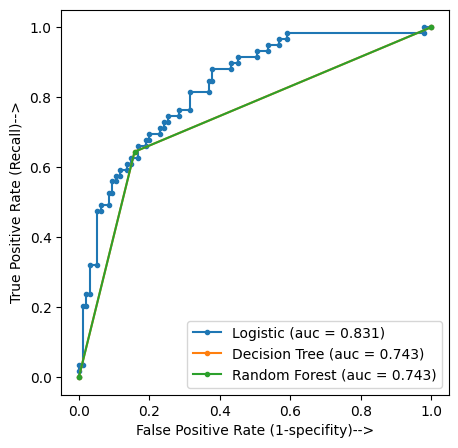

In [18]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(y_test, y_pred_dt[:,1:2])
auc_dt = auc(dt_fpr, dt_tpr)

rfr_fpr, rfr_tpr, threshold = roc_curve(y_test, y_pred_rf[:,1:2])
auc_rfr = auc(rfr_fpr, rfr_tpr)

plt.figure(figsize=(5,5),dpi=100)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (auc = %0.3f)' % auc_dt)
plt.plot(rfr_fpr, rfr_tpr, marker='.', label='Random Forest (auc = %0.3f)' % auc_rfr)

plt.xlabel('False Positive Rate (1-specifity)-->')
plt.ylabel('True Positive Rate (Recall)-->')
plt.legend()
plt.show()